In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

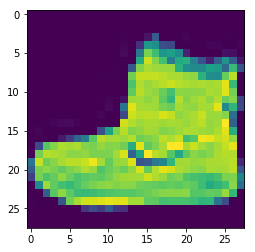

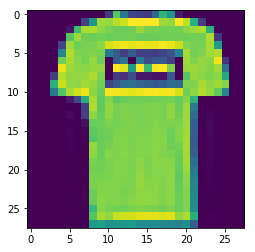

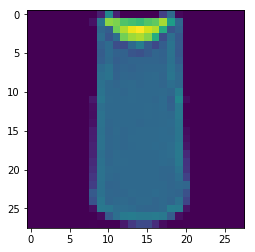

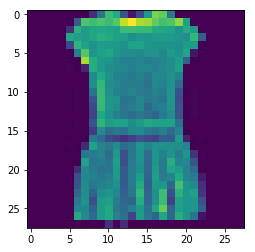

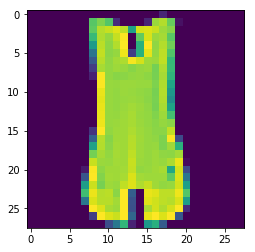

In [3]:
for i in range(5):
    plt.imshow(X_train[i].reshape([28,28]))
    plt.show()

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5711

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

In [22]:
### Your code here
n_components = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
accuracy_scores = []
variance_of_accuracy = []
std_of_accuracy = []
number_of_run = 10
for components in n_components:
    scores = [] 
    for i in range(number_of_run):
        pca = PCA(n_components=components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr.fit(X_train_lowdim, y_train[used_indices])
        scores.append(accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784])))))
    accuracy_scores.append(np.mean(scores))
    std_of_accuracy.append(np.std(scores))
    variance_of_accuracy.append(np.var(scores))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


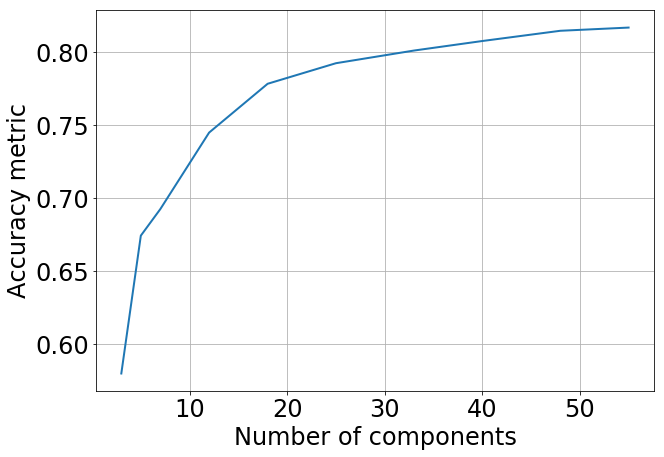

In [24]:
plt.figure(figsize=(10,7))
plt.plot(n_components, accuracy_scores)
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Accuracy metric")
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


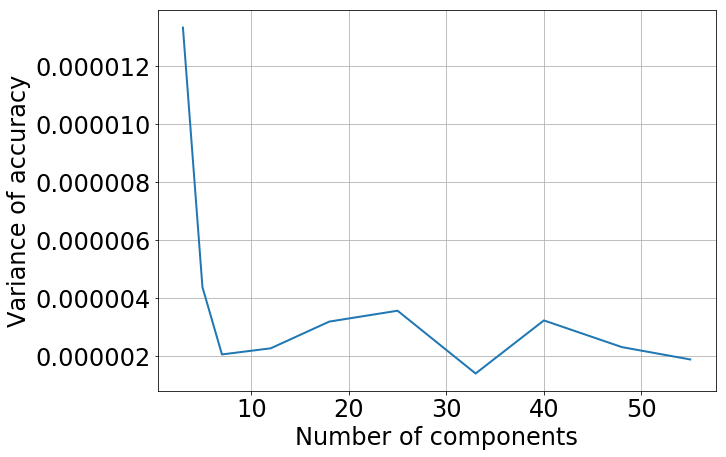

In [23]:
plt.figure(figsize=(10,7))
plt.plot(n_components, variance_of_accuracy)
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Variance of accuracy")
plt.show()

### Вывод
Можно уменьшить размерность, улучшив тем самым качество.

# Третье задание

In [ ]:
### Your code here
accuracy_scores = []
std_of_accuracy_2 = []
number_of_run = 5
for sample_size in range(1000, X_train.shape[0], 1000):
    scores = [] 
    for i in range(number_of_run):
        pca = PCA(n_components=components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), sample_size, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr.fit(X_train_lowdim, y_train[used_indices])
        scores.append(accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784])))))
    accuracy_scores.append(np.mean(scores))
    std_of_accuracy_2.append(np.std(scores))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


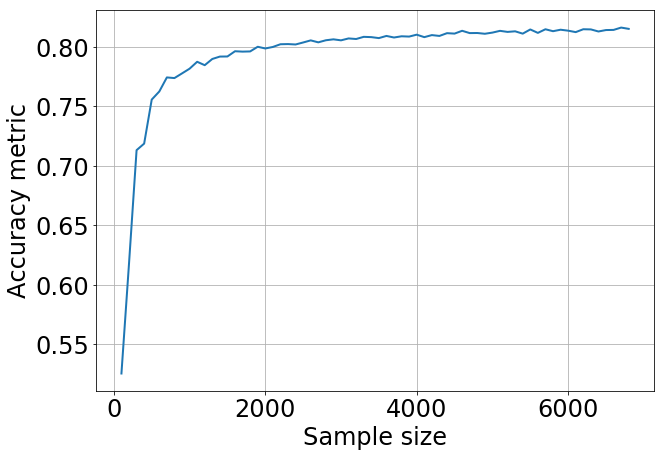

In [32]:
plt.figure(figsize=(10,7))
plt.plot(range(100, (len(accuracy_scores) + 1) * 100, 100), accuracy_scores)
plt.grid()
plt.xlabel("Sample size")
plt.ylabel("Accuracy metric")
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


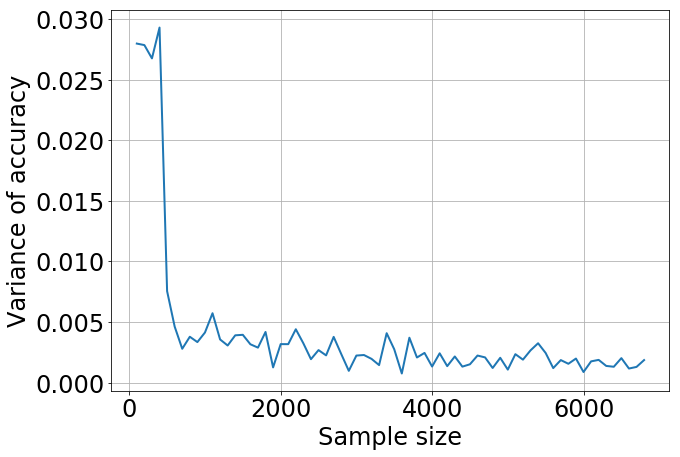

In [39]:
plt.figure(figsize=(10,7))
#plt.plot(range(100, (len(std_of_accuracy) + 1) * 100, 100), std_of_accuracy)
plt.plot(range(100, (len(std_of_accuracy_2) + 1) * 100, 100), std_of_accuracy_2)
plt.grid()
plt.xlabel("Sample size")
plt.ylabel("Variance of accuracy")
plt.show()